Problem 3.3: Oscillating chemical reactions

In [1]:
from numpy import empty, array, arange, linspace
from pylab import plot, show

A = 1
B = 3

a = 0.0
b = 20.0
delta = 1e-10     # Required position accuracy per unit time

In [4]:

#####################################################################
def f(r):
    x = r[0]
    y = r[1]
    fx = 1 - (B+1)*x + A*y*x**2
    fy = B*x - A*y*x**2
    return array([fx, fy], float)

############################################################################# END OF f(r)


def step(r, t, H):      # take in r at time t. Return r at time t+H
    # Do one modified midpoint step to get things started
    limit = 8           # Set maximum limit of n                               <------------------- resolution
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    # The array R1 stores the first row of the
    # extrapolation table, which contains only the single
    # modified midpoint estimate of the solution at the
    # end of the interval
    R1 = empty([1,2],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Now increase n until the required accuracy is reached
    error = 2*H*delta
    while error>H*delta:
        if n > limit or max(r1) > 1e10 or max(r2) > 1e10:    # Check limit. Also prevent overflow problem
            break
        n += 1
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates.  Arrays R1 and R2
        # hold the two most recent lines of the table
        R2 = R1
        R1 = empty([n,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])


    if n > limit or max(r1) > 1e10 or max(r2) > 1e10:  # if n > limit or overflow : divide segment to 2
        half = step(r, t, H / 2)                # solve first half of segment
        full = step(half, t + H / 2, H / 2)     # solvesecond half of segment
        answer = full                           # return answer for t+H from 2-segment division

    else:                     
        answer = R1[n-1]      # If converge for n < limit, return this
        tpoints.append(t)     # Append to array
        xpoints.append(answer[0])
        ypoints.append(answer[1])
    return answer  # return answer to time t + H in step(r, t, H)

###################################################################### END OF STEP FUNCTION

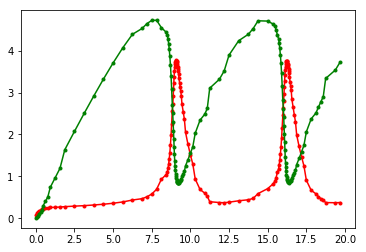

In [5]:

N = 1            # Number of "big steps"
H = 20           # Only 1 interval with step = 20
r = array([0.0, 0.0], float)   #initial value
xpoints = []
ypoints = []
tpoints = []

step(r, 0, H) # initialize function starting with t = 0
# Plot the results

plot(tpoints, xpoints, 'r-')
plot(tpoints, xpoints, "r.")
plot(tpoints, ypoints, 'g-')
plot(tpoints, ypoints, "g.")
show()

To increase 'resolution', lower limit to n before dividing into 2 segments. Drawback: increase in running time.